# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

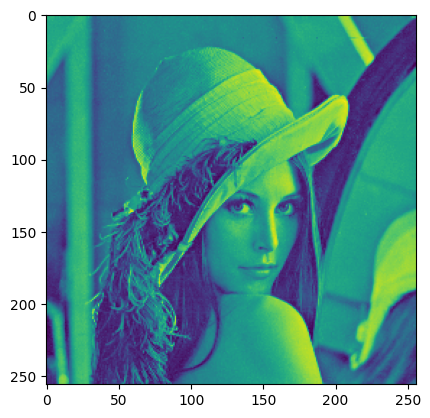

In [2]:
lena_orig = plt.imread('data/lena.png')
plt.imshow(lena_orig)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [3]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        counter = 0
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            x = p[0]-n+q[0]
            y = p[1]-n+q[1]
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                neighborhood_sum = neighborhood_sum + img[x, y]
                counter = counter + 1
        if counter == size ** 2:
            result[p] = neighborhood_sum / (size ** 2)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

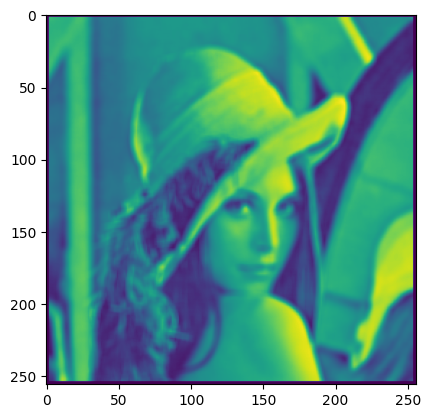

In [4]:
plt.imshow(meanfilter(lena_orig, 5))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [6]:
assert numpy.allclose(meanfilter(lena_orig, 5), plt.imread('data/lena_meanfilter5.png'), atol=1/255)
#plt.imshow(plt.imread('data/lena_meanfilter5.png'))

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [9]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        counter = 0
        intensity_list = []
        for q in numpy.ndindex(size, size):
            x = p[0]-n+q[0]
            y = p[1]-n+q[1]
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                intensity_list.append(img[x,y])
                counter = counter + 1
        if counter == size ** 2:
            result[p] = numpy.median(intensity_list)
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

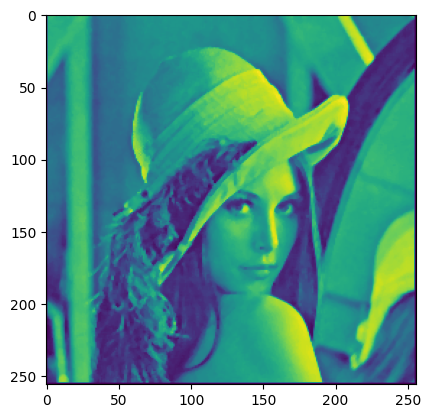

In [13]:
plt.imshow(medianfilter(lena_orig.copy(), 3))

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [14]:
assert numpy.allclose(medianfilter(lena_orig.copy(), 5), plt.imread('data/lena_medianfilter5.png'), atol = 1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [15]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

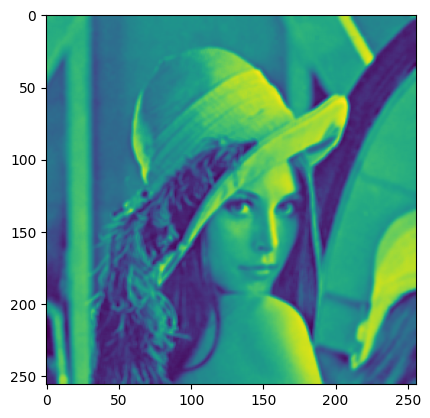

In [19]:
plt.imshow(scipy.ndimage.uniform_filter(lena_orig.copy(), 3))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

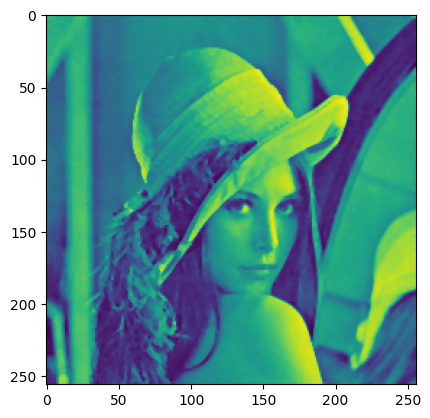

In [20]:
plt.imshow(scipy.ndimage.median_filter(lena_orig.copy(), 3))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

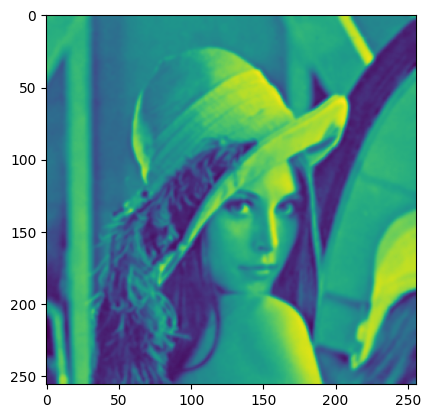

In [22]:
plt.imshow(scipy.ndimage.gaussian_filter(lena_orig.copy(), 1))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

They don´t have a black border. The function might use surrounding pixels in the image to calculate a value for the pixels on the border.

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [41]:
def fastfilter(img, size):
    n = (size - 1) //2
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0]-n and n <= p[1] < img.shape[1]-n:
            result[p] = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1].mean()
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

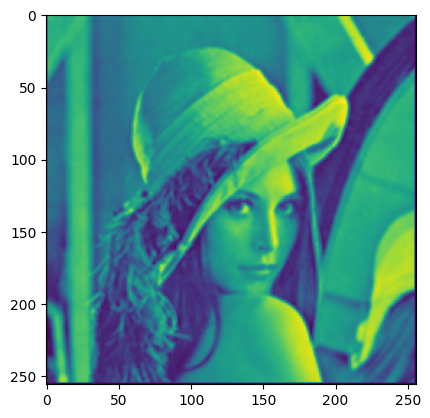

In [42]:
plt.imshow(fastfilter(lena_orig.copy(), 3))

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [46]:
assert numpy.allclose(meanfilter(lena_orig.copy(), 3), fastfilter(lena_orig.copy(), 3), atol = 1/255)
#plt.imshow(medianfilter(lena_orig.copy(), 3))
#plt.imshow(fastfilter(lena_orig.copy(), 3))

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [47]:
%timeit fastfilter(lena_orig.copy(), 9)
%timeit meanfilter(lena_orig.copy(), 9)

523 ms ± 98.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


5.27 s ± 360 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

The fast filter is faster, because it consists of only one loop.